By seasonality, we mean periodic fluctuations

In [69]:
%matplotlib notebook
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


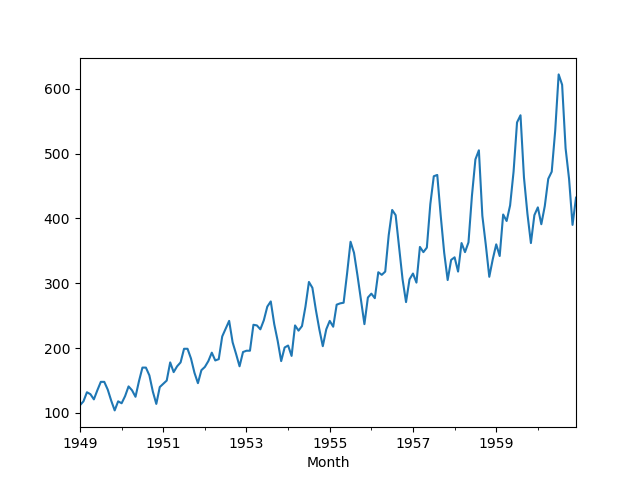

In [70]:
series = Series.from_csv('international-airline-passengers.csv',header=0)
plt.figure()
series.plot();

## Autocorrelation

### Removing Trends

Autocorrelation plot works on stationary series. If a given series does not satisfy this condition, differenciate, remove the trend and apply logarithm are common techniques to make front to this behavior.

<IPython.core.display.Javascript object>


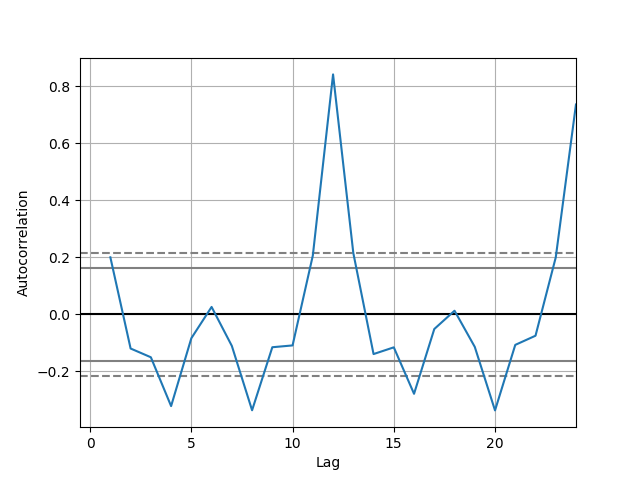

(-0.5, 24)

In [71]:
f,ax = plt.subplots(1,1)
y=np.log(series).diff().dropna()
pd.plotting.autocorrelation_plot(y,ax=ax)
ax.set_xlim(-0.5,24)

fourier Analysis

In [72]:
from numpy.fft import fft

<IPython.core.display.Javascript object>


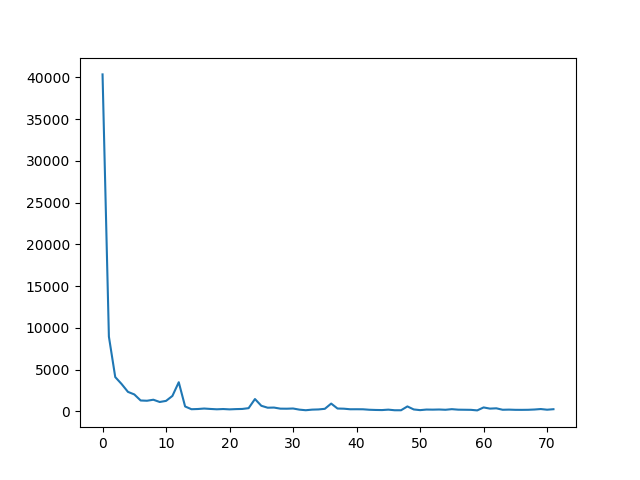

In [73]:
n = series.shape[0]
FFT = np.abs(fft(series))[:int(n/2)]
plt.figure()
plt.plot(FFT);

It also may work over the transformation log(diff(serie)) which keep the sesonality, making sesonality more evident.

<IPython.core.display.Javascript object>


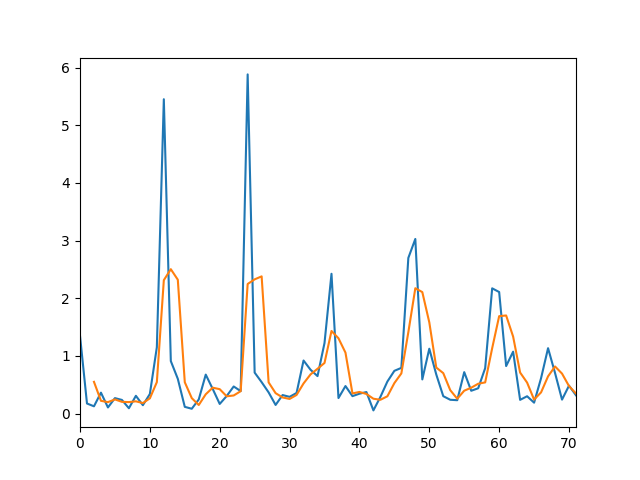

In [76]:
FFT = np.abs(fft(y))[:int(n/2)]
plt.figure()
plt.plot(FFT);
#appling a filter for smothing peaks
f = pd.Series(FFT).rolling(window=3,center=False).mean()
f.plot();